### Steps
    Generating Data for MA models
    Plot dataset
    Exploring Dataset using using PACF an AFC to find p, q
    Check if data is stationary or not(using ADF test)
    (If not stationary perform various transpormations like .diff(), lof, square root, proportional change etc. )
    After making stationary, Try finding d, p, q using ACF and PACF plot
    Apply ARIMA model and do predictions/forecasting
    Evaluate the time series model

### Importing libraraies and packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### MA modeing using sampled or generated data

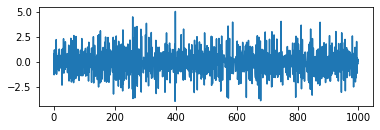

In [2]:
#### import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])#MA coefficient m1=-0.9
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)



###### Result: The above is a MA time series with lag coefficient of +0.9

### Check if data is stationary or not(using ADF test)


In [3]:
#Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(simulated_data_1)

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-12.120579115803421
1.829287720681478e-22
{'1%': -3.4370403176323214, '5%': -2.8644937368358425, '10%': -2.5683427207413576}


#### Result of ADF test:
   Since p-value is lesser than 0.05, the H0 (time series is non stationary) is rejected. Thus the time series is stationary

###    Exploring Dataset using using PACF an AFC to find p, q

In [4]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

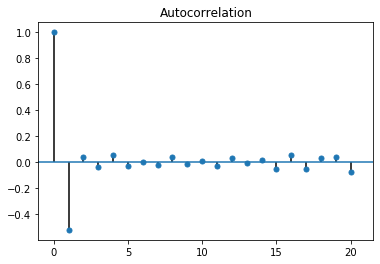

In [5]:
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

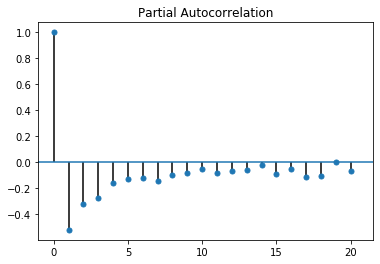

In [6]:
plot_pacf(simulated_data_1, alpha=1, lags=20)
plt.show()

##### Result from ACF and PACF plot

Since the PACF plot is gradually trails off so it is a MA model. ACF plot is vanishing abruptly after lag 1, So it a MA model of order 1 ie MA(1)

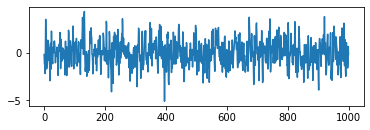

In [7]:
# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, +0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)#generated sampled data
plt.plot(simulated_data_2)

plt.show()

###### Result: The above is a MA time series with lag coefficient of 0.9

#### Plotting ACF and PACF model for second MA model

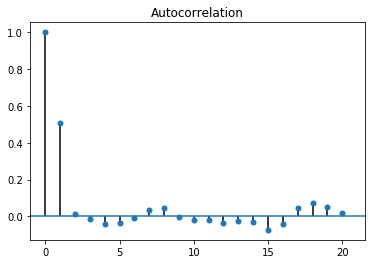

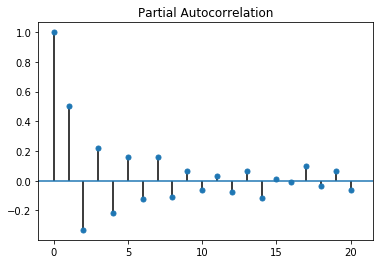

In [8]:
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

plot_pacf(simulated_data_2, alpha=1, lags=20)
plt.show()


##### Result from ACF and PACF plot

Since the PACF plot is gradually trails off so it is a MA model. ACF plot is vanishing abruptly after lag 1, So it is also an MA model of order 1 ie MA(1)

### Create ARMA model: MA(1)

In [9]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1416.708
Method:                       css-mle   S.D. of innovations              0.997
Date:                Sun, 12 Apr 2020   AIC                           2839.416
Time:                        19:48:41   BIC                           2854.139
Sample:                             0   HQIC                          2845.012
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0024      0.002     -1.103      0.270      -0.007       0.002
ma.L1.y       -0.9319      0.012    -79.140      0.000      -0.955      -0.909
                                    Roots           

##### Result from ARMA model:
    order(0,1)
    dependent variable :y
    No. Observations: 1000
    const          -0.0014    
    ma.L1.y       -0.9079 (m1 value of Et-1)
    AIC and BIC values can be seen too for selection from distinct models
    
    
    

### Create ARMA model: second  MA(1)

In [10]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_2, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0-.9, the estimate of phi (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1413.145
Method:                       css-mle   S.D. of innovations              0.993
Date:                Sun, 12 Apr 2020   AIC                           2832.291
Time:                        19:48:41   BIC                           2847.014
Sample:                             0   HQIC                          2837.886
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0033      0.060     -0.055      0.956      -0.121       0.114
ma.L1.y        0.9080      0.013     70.913      0.000       0.883       0.933
                                    Roots           

### Forecating the sampled model

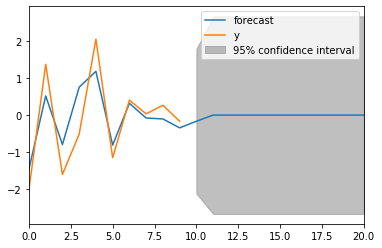

In [11]:
# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)#prediction start and end indices from the time series time column
plt.show()

#### Result:
    Notice how, when phi(-0.9) is low like here, the forecast gradually moves to the long term mean of zero, but if m1 were high, it would move much quicker to the long term mean. Lets try for second model MA(1)

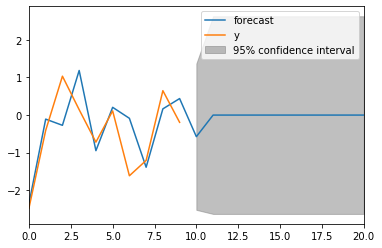

In [12]:
# Forecast the first MA(1) model
mod = ARMA(simulated_data_2, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)#prediction start and end indices from the time series date column
plt.show()

### Evaluation of the model

In [13]:
# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(res.resid))

# Print mean absolute error
print(mae)

# Print summary
print(res.summary())

0.8030512380586315
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1413.145
Method:                       css-mle   S.D. of innovations              0.993
Date:                Sun, 12 Apr 2020   AIC                           2832.291
Time:                        19:48:42   BIC                           2847.014
Sample:                             0   HQIC                          2837.886
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0033      0.060     -0.055      0.956      -0.121       0.114
ma.L1.y        0.9080      0.013     70.913      0.000       0.883       0.933
                                 

##### Extra tip: The p,q values can be found using 
    1) PACF and ACF plot (Ploting techniques)
    2)Using AIC and BIC (Information criteria method)